In [42]:
import importlib
import lab2
import copy
import numpy as np
from cv2 import imread, imwrite, hconcat, resize
import time

#from diffusion import take_params, get_probs, fill_graph_edges, diffusion_alg, labeling
# importlib.reload(lab2)

Read the image as float array, rescale it and set the parameters:

In [43]:
filename = "field1.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(float)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)

Zero iteration:

- take parameters of normal distribution from sky and ground on image;
- create an array of probabilities of class 0 and class 1 for each pixel;
- create start graph with edges depends on epsilon and probabilities;

In [44]:
start_time = time.time()

mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)

zero_iter_time = time.time() - start_time
print("Zero iteration time:  %s seconds; " % zero_iter_time)

Zero iteration time:  29.560107469558716 seconds; 


Some start graph edges:

In [45]:
print(graph[5, 2] , "\n")
print(graph[-2, -5])

[-12.13507905 -28.28838848 -28.28838848 -48.83614705] 

[-1126.95625307  -579.15125413  -563.42932746   -20.01877768]


Diffusion algorithm:

In [46]:
start_time = time.time()

new_graph = lab2.diffusion_alg(n_iterations, graph)

alg_time = time.time() - start_time
print("Diffusion time: %s seconds;" % alg_time)
print("time per diffusion iteration: ", alg_time / n_iterations)

Diffusion time: 4.5422046184539795 seconds;
time per diffusion iteration:  0.045422046184539794


Same edges after diffusion:

In [47]:
print(new_graph[5, 2])
print(new_graph[-2, -5])
# np.savetxt('0.txt', new_graph[500:540,:30,0],fmt='%.3f', delimiter='\t')
# np.savetxt('1.txt', new_graph[500:540,:30,1],fmt='%.3f',  delimiter='\t')
# np.savetxt('2.txt', new_graph[500:540,:30,2],fmt='%.3f',  delimiter='\t')
# np.savetxt('3.txt', new_graph[500:540,:30,3],fmt='%.3f',  delimiter='\t')


[-11.5296276  -28.10780115 -28.13702561 -48.79100022]
[-5.63528357e+02 -5.59132476e+02 -1.43103378e-03 -2.84410338e-10]


Now we need to pick labeling for graph:

In [48]:
start_time = time.time()

graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)

alg_time = time.time() - start_time
print("Labeling time: %s seconds;" % alg_time)
# print("time per Labeling iteration: ", alg_time / n_iterations)

labeling...
Start epsilon:  2357.149073082271
For epsilon =  1178.5745365411356 : looking...
For epsilon =  589.2872682705678 : looking...
For epsilon =  294.6436341352839 : looking...
For epsilon =  147.32181706764194 : looking...
For epsilon =  73.66090853382097 : looking...
For epsilon =  36.830454266910486 : looking...
For epsilon =  18.415227133455243 : looking...
For epsilon =  9.207613566727622 : looking...
For epsilon =  4.603806783363811 : looking...
For epsilon =  2.3019033916819054 : looking...
For epsilon =  1.1509516958409527 : looking...
For epsilon =  0.5754758479204763 : looking...
For epsilon =  0.2877379239602382 : looking...
For epsilon =  0.1438689619801191 : looking...
For epsilon =  0.07193448099005954 : looking...
For epsilon =  0.03596724049502977 : looking...
For epsilon =  0.017983620247514886 : looking...
For epsilon =  0.008991810123757443 : looking...
For epsilon =  0.0044959050618787215 : looking...
For epsilon =  0.0022479525309393607 : looking...
For eps

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]]


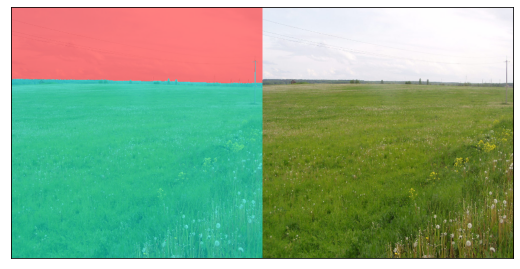

True

In [49]:
print(final_labels)

result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  6402.636056911133
For epsilon =  3201.3180284555665 : looking...
For epsilon =  1600.6590142277832 : looking...
For epsilon =  800.3295071138916 : looking...
For epsilon =  400.1647535569458 : looking...
For epsilon =  200.0823767784729 : looking...
For epsilon =  100.04118838923645 : looking...
For epsilon =  50.020594194618226 : looking...
For epsilon =  25.010297097309113 : looking...
For epsilon =  12.505148548654557 : looking...
For epsilon =  6.252574274327278 : looking...
For epsilon =  3.126287137163639 : looking...
For epsilon =  1.5631435685818196 : looking...
For epsilon =  0.7815717842909098 : looking...
Final labeling founded;
 Final epsilon =  0.7815717842909098


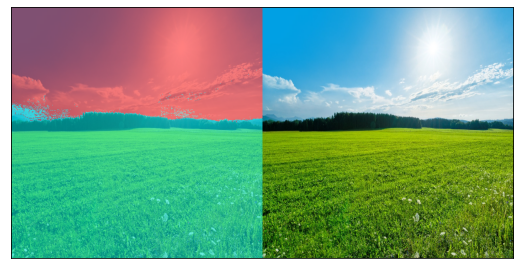

True

In [50]:
filename = "field2.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

In [ ]:
filename = "field3.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

In [ ]:
filename = "field4.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

In [ ]:
filename = "field5.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

In [ ]:
filename = "field6.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)